In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [ ]:
# Reading data from csv
housing= pd.read_csv('https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
housing.shape

(1460, 81)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


DATA CLEANUP


* Missing value check

In [ ]:
missing_info= round(housing.isna().sum() * 100/housing.shape[0], 2)
missing_info[missing_info > 0].sort_values(ascending= False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [ ]:
# Filter out columns with missing values (counts greater than 0)
missing_val_cols = missing_info[missing_info > 0]

# Sort the columns by the number of missing values in descending order
missing_val_cols = missing_val_cols.sort_values(ascending=False)

# Get the column names
missing_val_cols = missing_val_cols.index.tolist()
missing_val_cols

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'FireplaceQu',
 'LotFrontage',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtFinType2',
 'BsmtFinType1',
 'BsmtCond',
 'BsmtQual',
 'MasVnrArea',
 'MasVnrType',
 'Electrical']

In [ ]:
# Iterate through columns with missing values and print unique value counts
[print('\nColumn Name:', col, '\n', housing[col].value_counts(dropna=False)) for col in missing_val_cols]


Column Name: PoolQC 
 NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

Column Name: MiscFeature 
 NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

Column Name: Alley 
 NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

Column Name: Fence 
 NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

Column Name: FireplaceQu 
 NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Column Name: LotFrontage 
 NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64

Column Name: GarageType 
 Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

Column Name: GarageYrBlt 
 NaN       81
2005.0    65
2006.0    59


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# Define the columns to replace NaN values in
valid_nan_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

# Replace NaN values with 'Not Present' in the specified columns
housing[valid_nan_cols] = housing[valid_nan_cols].fillna('Not Present')

In [ ]:
# Calculate the percentage of missing values for each column
missing_percent = (housing.isna().sum() / len(housing)) * 100

# Filter columns with missing values (percentage greater than 0)
missing_cols = missing_percent[missing_percent > 0]

# Sort the columns by the percentage of missing values in descending order
missing_cols = missing_cols.sort_values(ascending=False)

# Display the sorted missing value percentages
print(missing_cols)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64


If garage is not available then there will be no 'GarageYrBlt' value for that.

In [ ]:
# Count the occurrences of 'GarageType' values when 'GarageYrBlt' is missing
missing_garage_type_counts = housing[housing['GarageYrBlt'].isna()]['GarageType'].value_counts(normalize=True)

# Display the percentage distribution of 'GarageType' values
print(missing_garage_type_counts)

# Impute missing values of 'GarageYrBlt' column
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

Not Present    1.0
Name: GarageType, dtype: float64


EXPLORATORY DATA ANALYSIS:

<Axes: xlabel='SalePrice', ylabel='Density'>

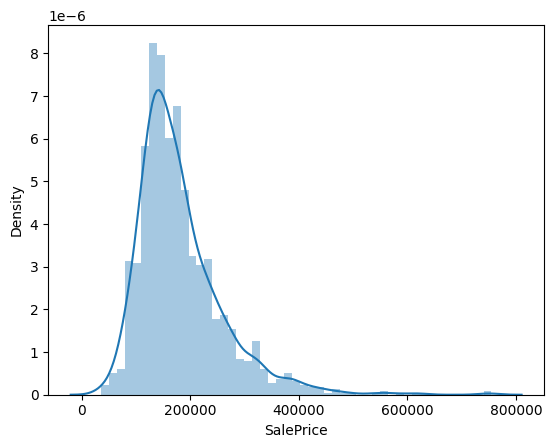

In [ ]:
# Checking distribution of SalePrice
sns.distplot(housing['SalePrice'])

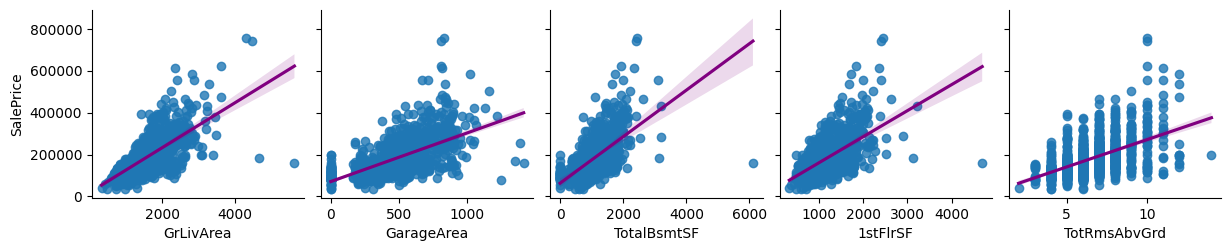

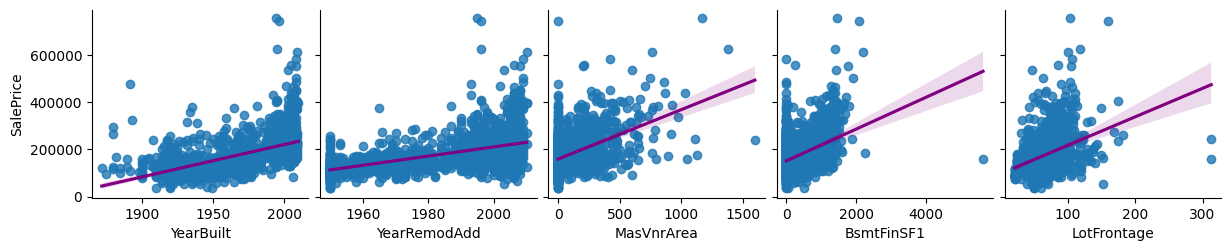

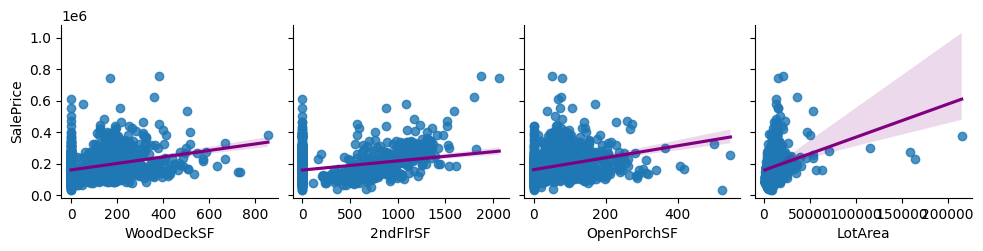

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea']

# Define the number of columns per row in the pair plots
columns_per_row = 5

# Create pair plots for numeric variables
for i in range(0, len(numeric_cols), columns_per_row):
    cols_subset = numeric_cols[i:i + columns_per_row]
    sns.pairplot(data=housing, x_vars=cols_subset, y_vars='SalePrice', kind='reg', plot_kws={'line_kws': {'color': 'purple'}})

# Show the pair plots
plt.show()

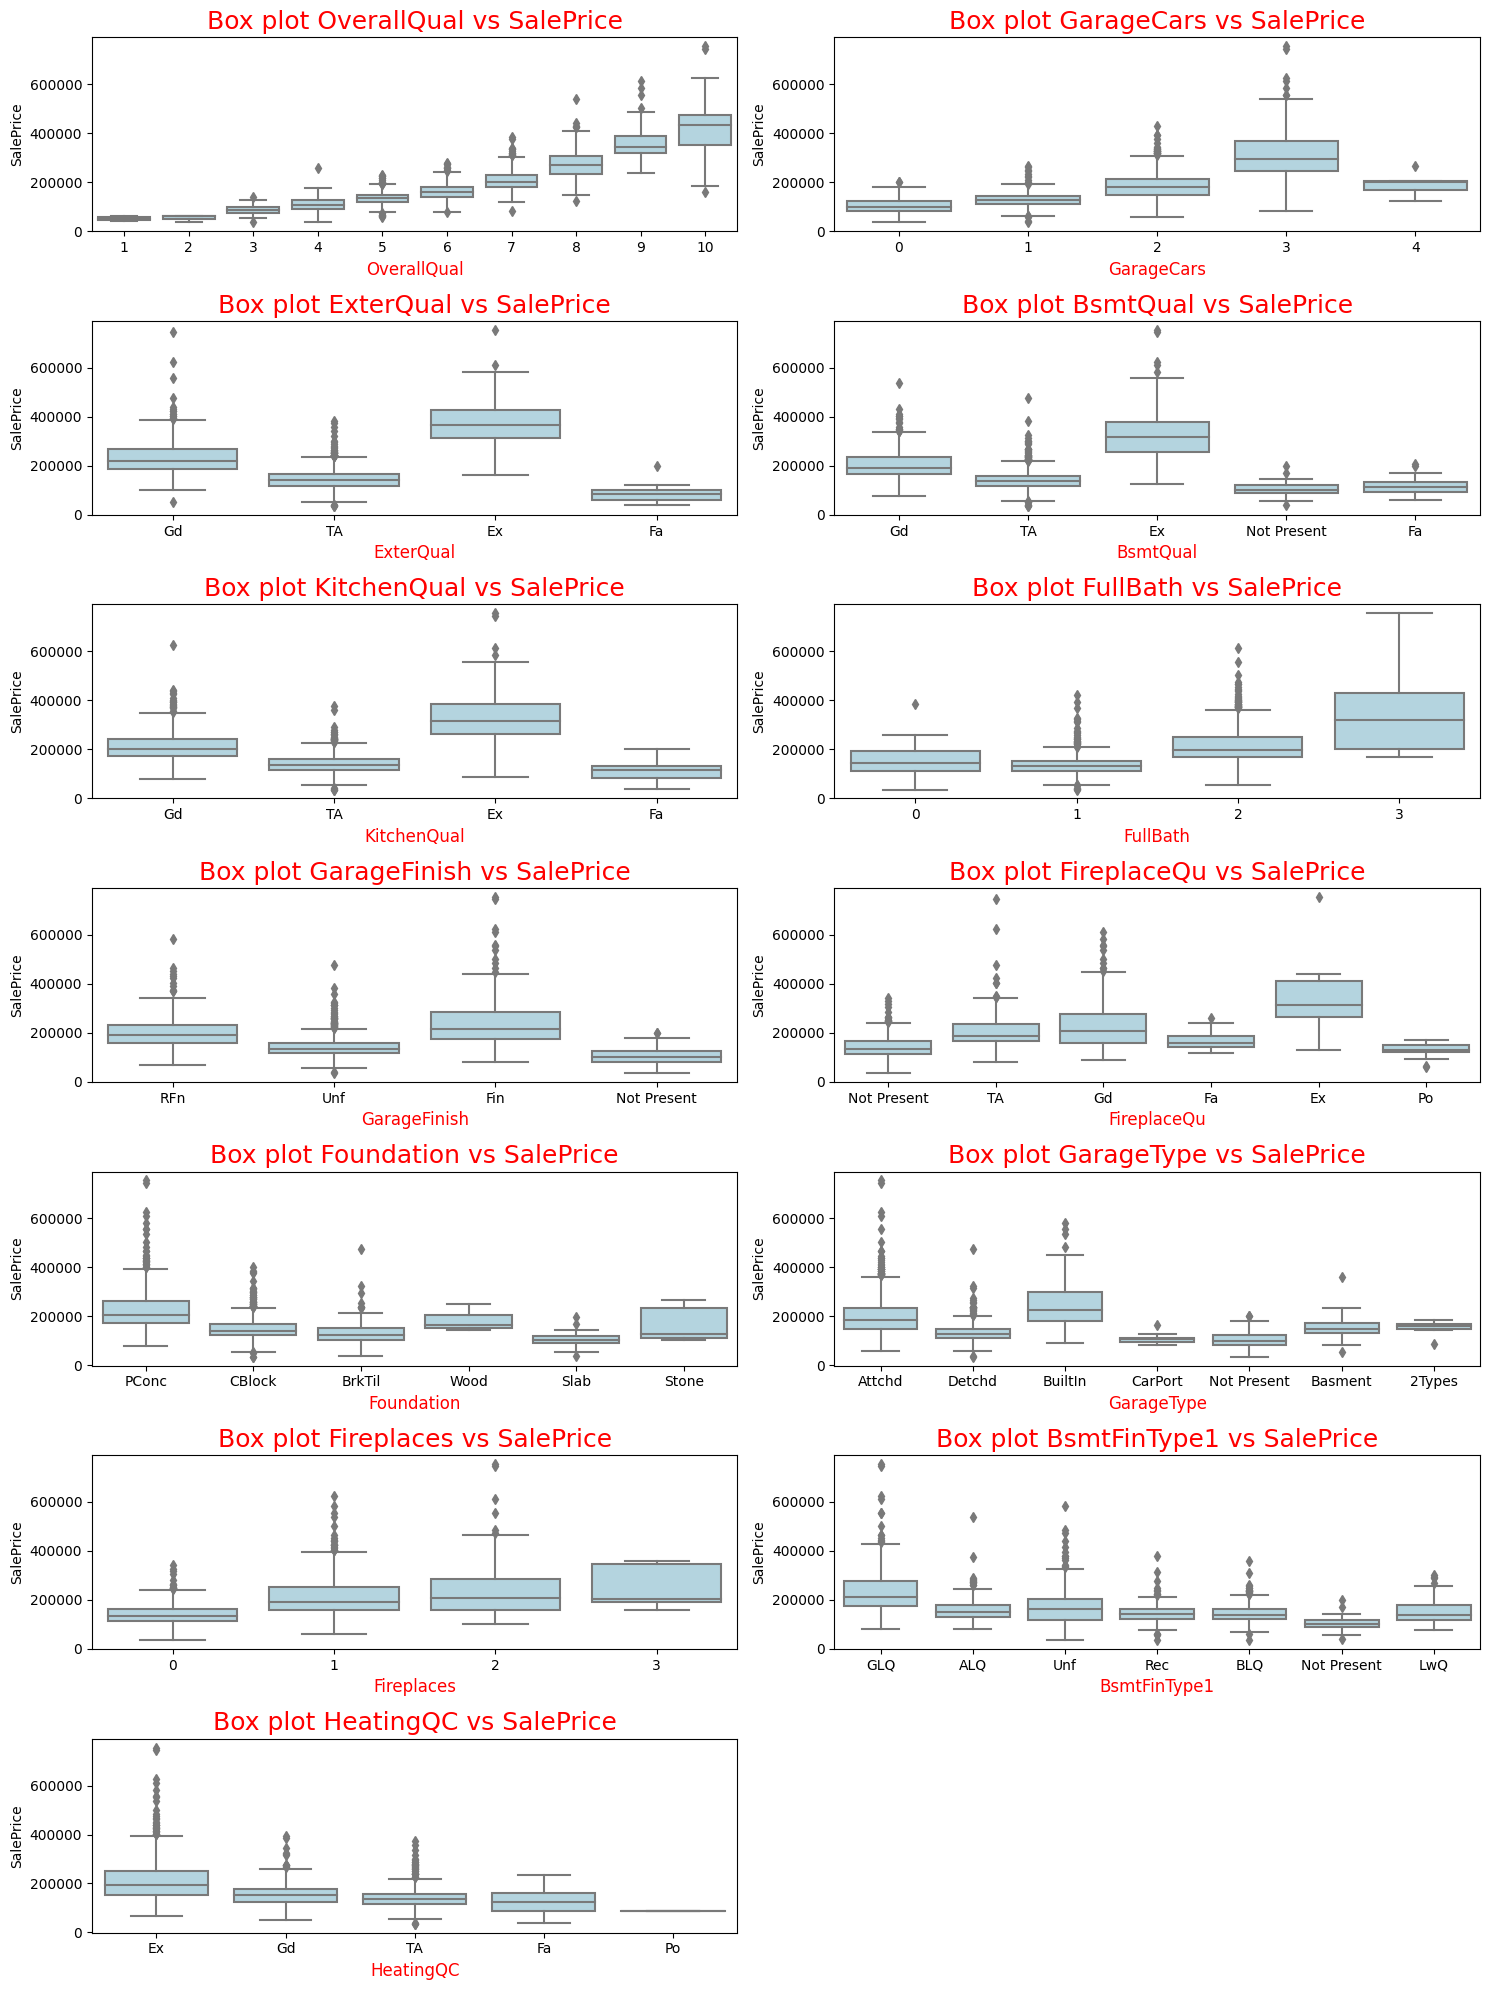

In [ ]:
cat_cols = ['OverallQual', 'GarageCars', 'ExterQual', 'BsmtQual', 'KitchenQual', 'FullBath', 'GarageFinish', 'FireplaceQu', 'Foundation', 'GarageType', 'Fireplaces', 'BsmtFinType1', 'HeatingQC']

# Define the number of rows and columns for subplots
num_rows = len(cat_cols) // 2 + len(cat_cols) % 2
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Custom colors
box_color = 'lightblue'  # Change box color here
label_color = 'red'  # Change label color here

# Loop through categorical columns and create box plots
for i, col in enumerate(cat_cols):
    sns.boxplot(data=housing, x=col, y='SalePrice', color=box_color, ax=axes[i])
    axes[i].set_title(f'Box plot {col} vs SalePrice', fontsize=18, color=label_color)
    axes[i].set_xlabel(col, fontsize=12, color=label_color)

# Remove any empty subplots if the number of columns is odd
if len(cat_cols) % 2 == 1:
    fig.delaxes(axes[len(cat_cols)])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<Figure size 2000x700 with 0 Axes>

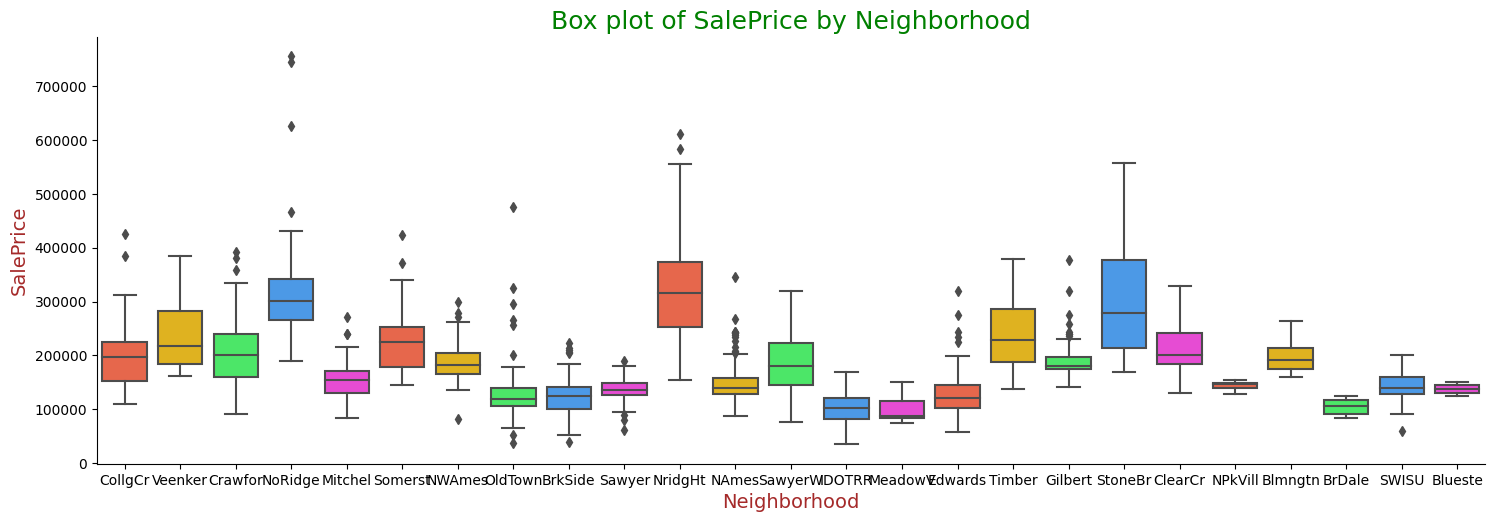

In [ ]:
# Define a custom color palette
custom_palette = ["#FF5733", "#FFC300", "#33FF57", "#3399FF", "#FF33E6"]

plt.figure(figsize=(20, 7))

sns.catplot(data=housing, x='Neighborhood', y='SalePrice', kind='box', palette=custom_palette, height=5, aspect=3)
plt.title('Box plot of SalePrice by Neighborhood', fontsize=18, color='Green')
plt.xlabel('Neighborhood', fontsize=14, color='Brown')
plt.ylabel('SalePrice', fontsize=14, color='Brown')

plt.show()

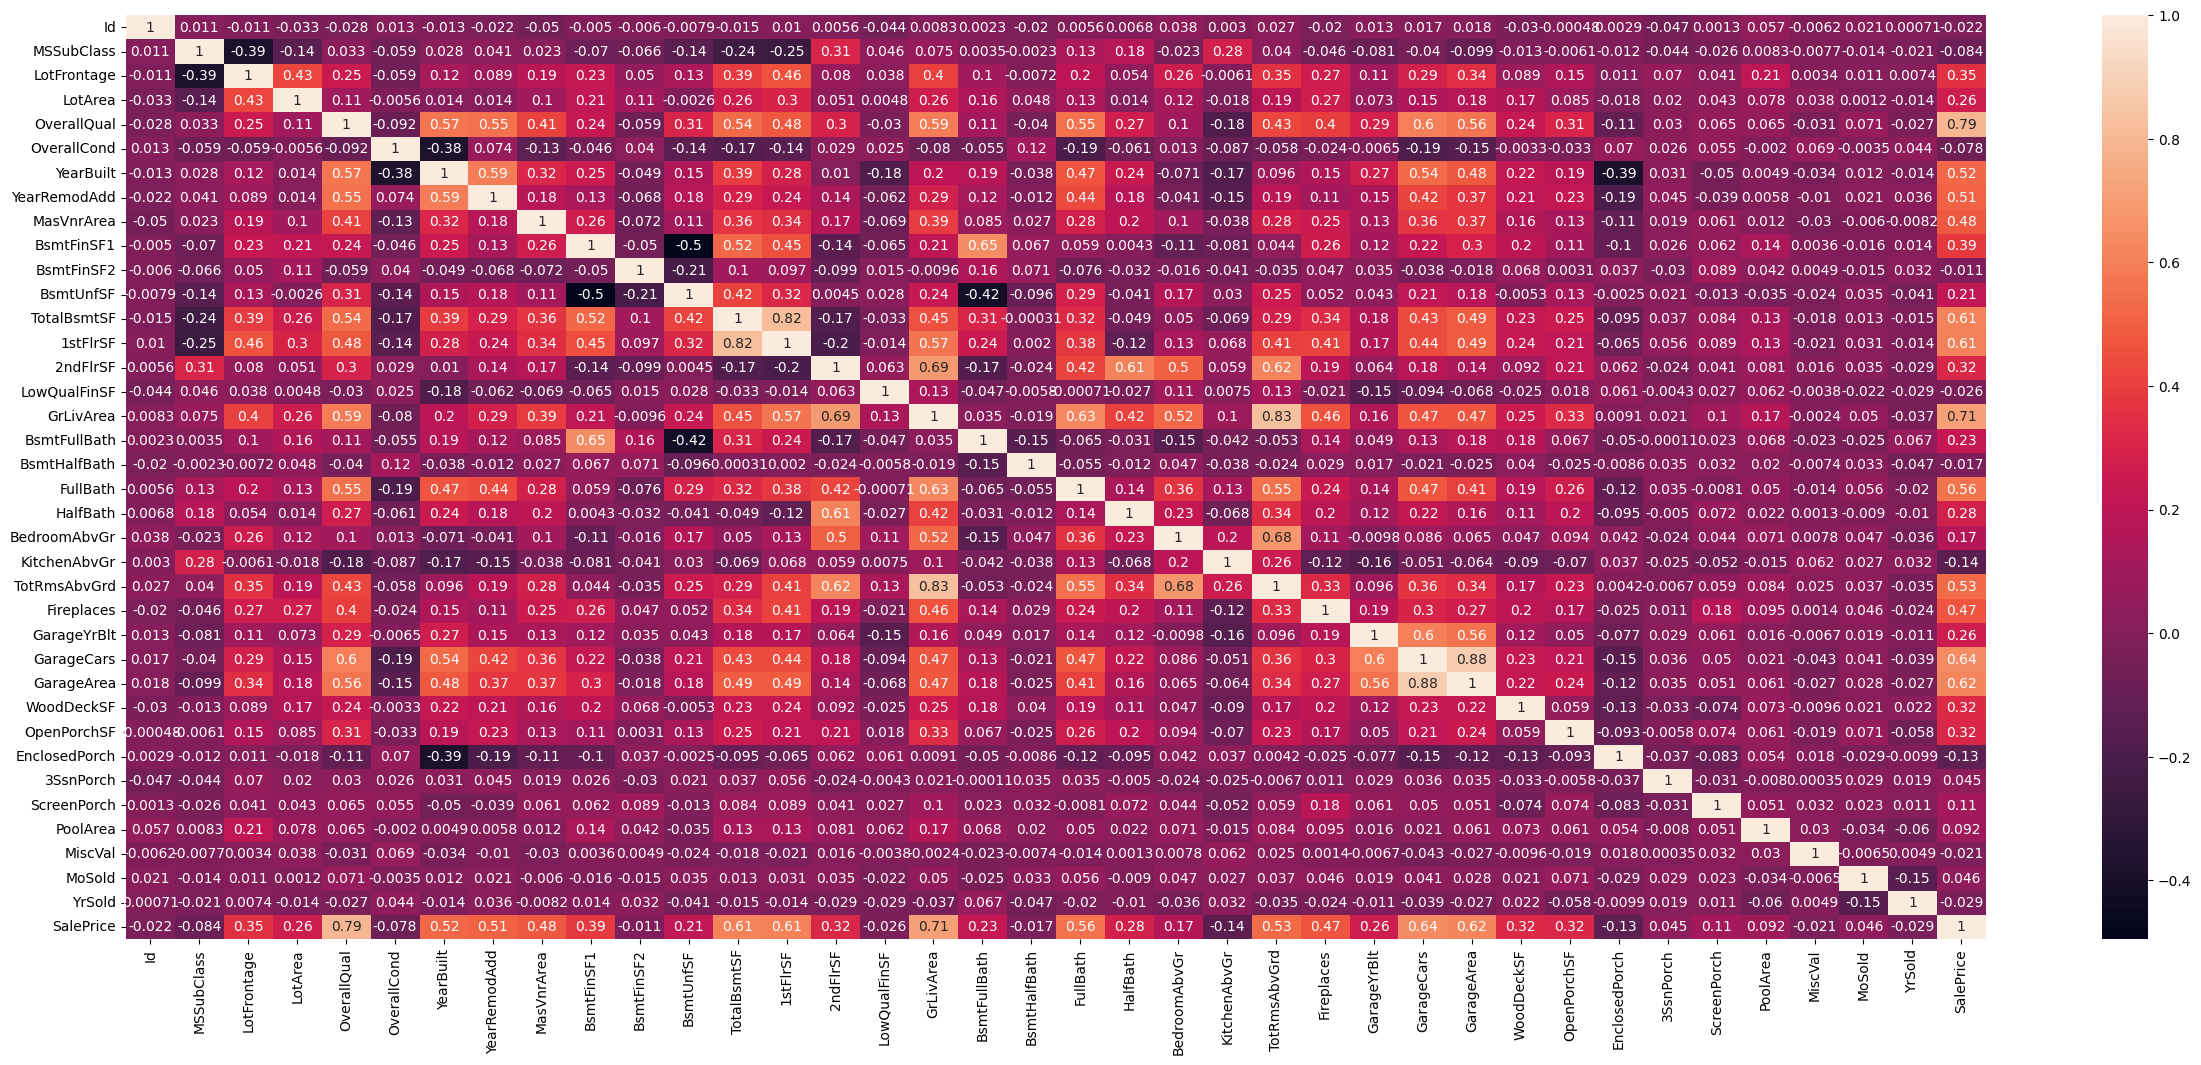

In [ ]:
# Creating correlation heatmap
plt.figure(figsize = (30, 12))
sns.heatmap(housing.corr(), annot= True)
plt.show()

In [ ]:
# Dropping GarageCars and TotRmsAbvGrd as they are having very high coefficients

housing.drop(['GarageCars','TotRmsAbvGrd'], axis= 1, inplace= True)
housing.shape

(1460, 79)

In [ ]:
housing_new= housing.copy()

Transforming the target variable

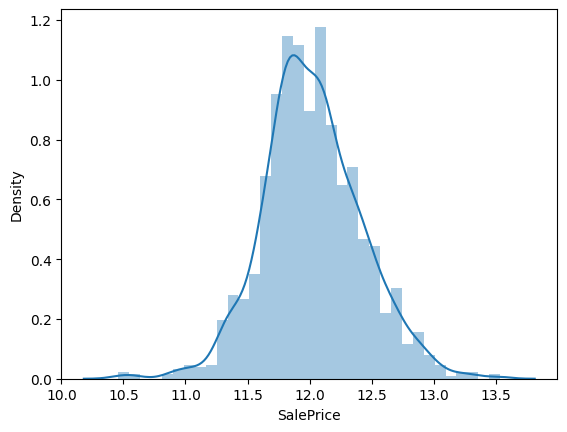

In [ ]:
# Distplot of log transformed SalePrice
sns.distplot(np.log(housing['SalePrice']))
plt.show()

In [ ]:
# Transform 'SalePrice' column and assign it to a new column 'SalePrice_log_trans'
housing['SalePrice_log'] = np.log(housing['SalePrice'])

# Drop 'Id' and the original 'SalePrice' columns
columns_to_drop = ['Id', 'SalePrice']
housing.drop(columns_to_drop, axis=1, inplace=True)

# Check the shape of the DataFrame after dropping columns
new_shape = housing.shape
print("New DataFrame shape:", new_shape)

New DataFrame shape: (1460, 78)


Train Test Data Split:

In [ ]:
# Splitting the data into features (X) and target (y)
y = housing['SalePrice_log']
X = housing.drop('SalePrice_log', axis=1)

# Perform the train-test split with a 70-30 ratio and a fixed random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

# Getting index values of the train and test datasets
train_index = X_train.index
test_index = X_test.index

In [ ]:
# Columns with missing values
columns_with_missing = ['LotFrontage', 'MasVnrArea', 'MasVnrType', 'Electrical']

# Impute missing values using the median for numeric columns and mode for categorical columns
for col in columns_with_missing:
    if housing[col].dtype == 'float64':
        housing[col].fillna(X_train[col].median(), inplace=True)
    else:
        housing[col].fillna(X_train[col].mode()[0], inplace=True)

Categorical Values:


In [ ]:
# Changing data type of MSSubClass
housing['MSSubClass']= housing['MSSubClass'].astype('object')

In [ ]:
# Select object type columns
housing_cat = housing.select_dtypes(include=['object'])

# Select numeric type columns
housing_num = housing.select_dtypes(exclude=['object'])

# Get summary statistics for object type columns
cat_summary = housing_cat.describe()

# You can also get summary statistics for numeric type columns if needed
num_summary = housing_num.describe()

In [ ]:
# Define the mapping dictionary for encoding
encoding_map = {'Street': {'Pave': 1, 'Grvl': 0},
                'Utilities': {'AllPub': 1, 'NoSeWa': 0},
                'CentralAir': {'Y': 1, 'N': 0}}

# Use the replace method to encode the columns
housing.replace(encoding_map, inplace=True)


In [ ]:
# List of columns to be encoded
cat_cols = housing_cat.columns.tolist()

# Columns that have already been encoded
done_encoding = ['Street', 'Utilities', 'CentralAir']

# Remove already encoded columns from the list
cat_cols = [col for col in cat_cols if col not in done_encoding]

# Create dummy variables for the remaining categorical columns
dummies = pd.get_dummies(housing_cat[cat_cols], drop_first=True)
dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
# Concatinating dummies with housing_df dataframe and droping original features
print('housing_df before droping original valiables', housing.shape)
print('shape of dummies dataframe', dummies.shape)
housing.drop(cat_cols, axis=1, inplace= True)
housing= pd.concat([housing, dummies], axis= 1)
print('final shape of housing', housing.shape)

housing_df before droping original valiables (1460, 78)
shape of dummies dataframe (1460, 234)
final shape of housing (1460, 271)


Scaling Numeric Features:

In [ ]:
# Re-construct train and test datasets using the train and test indices
X_train = housing.iloc[train_index].drop('SalePrice_log', axis=1)
y_train = housing.iloc[train_index]['SalePrice_log']
X_test = housing.iloc[test_index].drop('SalePrice_log', axis=1)
y_test = housing.iloc[test_index]['SalePrice_log']

In [ ]:
# Define the numeric columns (excluding 'SalePrice_log_trans')
num_cols = [col for col in housing_num.columns if col != 'SalePrice_log']

# Initialize the RobustScaler with quantile range
scaler = RobustScaler(quantile_range=(2, 98))

# Fit and transform the numeric columns for both training and test datasets
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [ ]:
X_train[num_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
318,0.221774,0.017358,0.2,0.00,0.201613,-0.017065,0.390244,0.412564,0.000000,-0.061654,...,0.194733,0.809909,0.141667,0.612245,0.0,0.0,0.0,0.0,-0.181818,0.25
239,-0.161290,-0.033574,0.0,-0.25,-0.282258,-0.750853,0.000000,-0.206629,0.000000,0.108196,...,-0.287674,0.000000,0.475000,0.000000,0.0,0.0,0.0,0.0,-0.181818,0.50
986,-0.090726,-0.184349,0.0,0.75,-0.635081,0.153584,0.000000,-0.271807,0.000000,0.013902,...,-0.248949,0.938542,-0.108333,0.000000,0.0,0.0,0.0,0.0,0.000000,-0.50
1416,-0.080645,0.080639,-0.4,0.25,-0.887097,-0.750853,0.000000,-0.271807,0.000000,0.190401,...,0.088515,0.000000,-0.108333,0.484694,0.0,0.0,0.0,0.0,-0.181818,0.50
390,-0.181452,-0.048339,-0.2,0.75,-0.735887,-0.750853,0.000000,-0.104701,0.555398,-0.140837,...,-0.106218,0.000000,0.433333,0.476190,0.0,0.0,0.0,0.0,-0.181818,0.00


Variance Thresholding

* Remvoing the categorical features having zero or close to zero variance

In [ ]:
# Initialize the VarianceThreshold with the desired threshold
var_t = VarianceThreshold(threshold=0.003)

# Fit and transform the training dataset
X_train_filtered = var_t.fit_transform(X_train)

# Get the indices of the selected columns
selected_columns = X_train.columns[var_t.get_support()]

# Get the columns with very low variance
low_variance_columns = X_train.columns[~var_t.get_support()]

# Display the columns with very low variance
print("Columns with very low variance:", low_variance_columns.tolist())

Columns with very low variance: ['Utilities', 'MSSubClass_40', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Gambrel', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_Other', 'Exterior2nd_Stone', 'ExterCond_Po', 'Foundation_Stone', 'Foundation_Wood', 'BsmtCond_Po', 'Heating_OthW', 'HeatingQC_Po', 'Electrical_FuseP', 'Electrical_Mix', 'Functional_Maj2', 'Functional_Sev', 'GarageQual_Po', 'PoolQC_Fa', 'PoolQC_Gd', 'MiscFeature_Othr', 'MiscFeature_TenC', 'SaleType_Con', 'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_AdjLand']


In [ ]:
# Specify the categorical value to count
categorical_value = 'Typ'

# Count the number of appearances of the specified value
count = (housing_new['Functional'] == categorical_value).sum()

# Print the count
print(f"Number of appearances of '{categorical_value}': {count}")

Number of appearances of 'Typ': 1360


In [ ]:
# Removing above columns from train and test dataset
X_train= X_train.loc[:, selected_columns]
X_test= X_test.loc[:, selected_columns]

In [ ]:
# Checking shape of final training dataset
X_train.shape

(1021, 226)

MODEL BUILDING

* Ridge Regression

In [ ]:
# Define the range of alpha values
range1 = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2 = list(range(2, 1001))

# Combine both ranges into a single list
alpha_range = range1 + range2

# Create the params_grid dictionary with 'alpha' as the key
params_grid = {'alpha': alpha_range}

In [ ]:
# Create the Ridge estimator
ridge = Ridge(random_state=42)

# Perform GridSearchCV to find the optimal alpha value
param_grid = {'alpha': alpha_range}
gcv_ridge = GridSearchCV(estimator=ridge,
                        param_grid=param_grid,
                        cv=3,
                        scoring='neg_mean_absolute_error',
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=1)
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Checking best estimator
gcv_ridge.best_estimator_

Ridge(alpha=8, random_state=42)

Optimal value of Ridge is 8.

In [ ]:
# Checking best MAE
gcv_ridge.best_score_

-0.09306765988028905

In [ ]:
# Fitting model using best_estimator_
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=8, random_state=42)

In [ ]:
# Evaluating on training dataset
y_train_pred= ridge_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9212808175591358
MSE on training dataset: 0.012370275972288505
RMSE on training dataset: 0.11122174235413014
MAE on training dataset: 0.07536074867045037


In [ ]:
# Evaluating on testing dataset
y_test_pred= ridge_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.8820724114129794
MSE on testing dataset: 0.019436209067663194
RMSE on testing dataset: 0.13941380515452262
MAE on testing dataset: 0.09335836776845349


In [ ]:
# Ridge coefficients
ridge_model.coef_

array([-1.93085528e-02,  3.96324556e-02,  2.99782112e-02,  2.10007673e-01,
        1.09800771e-01,  6.65492909e-02,  7.53993482e-02,  5.32809618e-03,
        3.25052492e-03,  2.64995797e-02,  3.11765941e-02,  3.67553809e-02,
        6.53725795e-02,  1.30755144e-01,  1.21965551e-01,  4.99577908e-05,
        1.77837606e-01,  4.47422563e-02,  6.38319958e-03,  9.42558081e-02,
        4.06979670e-02,  6.32795774e-02, -3.52923731e-02,  1.84728548e-02,
        8.62063864e-03,  1.17444679e-01,  4.38657207e-02, -3.23486816e-03,
        1.92838056e-02,  2.55407979e-04,  3.59571825e-02, -4.19566751e-04,
        1.53315906e-04, -3.89153753e-03, -2.17102238e-02, -8.70629168e-02,
       -6.55567894e-03,  9.68336128e-03, -3.38641782e-02,  4.54284943e-02,
        4.49608851e-02, -9.21269015e-03,  1.65730127e-02,  5.45303902e-03,
       -2.18952084e-02, -6.92306330e-02, -3.29130467e-02, -1.87196890e-02,
        5.76480883e-02,  5.09366680e-02,  7.57600973e-02,  2.85107467e-02,
       -6.30258046e-04,  

In [ ]:
# Ridge intercept
ridge_model.intercept_

11.58096649309431

In [ ]:
# Top 25 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

OverallQual             0.210008
GrLivArea               0.177838
1stFlrSF                0.130755
2ndFlrSF                0.121966
GarageArea              0.117445
OverallCond             0.109801
FullBath                0.094256
Neighborhood_NridgHt    0.090915
Neighborhood_Edwards   -0.089944
Neighborhood_Crawfor    0.088643
MSSubClass_30          -0.087063
Neighborhood_NoRidge    0.077550
Neighborhood_Somerst    0.076451
MSZoning_RL             0.075760
YearRemodAdd            0.075399
Neighborhood_MeadowV   -0.075331
Neighborhood_StoneBr    0.075263
Neighborhood_IDOTRR    -0.074244
BldgType_Twnhs         -0.072681
MSSubClass_160         -0.069231
Exterior1st_BrkFace     0.068271
YearBuilt               0.066549
SaleType_ConLD          0.066032
CentralAir              0.065373
BedroomAbvGr            0.063280
dtype: float64

* Lasso Regression

In [ ]:
# Applying Lasso and performing GridSearchCV to find optimal value of alpha (lambda)

params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Checking best estimator
lasso_gcv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [ ]:
# Checking best MAE
lasso_gcv.best_score_

-0.09110061393943254

In [ ]:
range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso,
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
# Checking best estimator
lasso_gcv.best_estimator_

Lasso(alpha=0.0007, random_state=42)

In [ ]:
# Fitting model using best_estimator_
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0007, random_state=42)

Optimal value of Lasso is 0.0007

In [ ]:
# Evaluating on training dataset
y_train_pred= lasso_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9110121758321986
MSE on training dataset: 0.013983935160354843
RMSE on training dataset: 0.11825368983822383
MAE on training dataset: 0.07775513532402539


In [ ]:
# Evaluating on testing dataset
y_test_pred= lasso_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.8811474224048781
MSE on testing dataset: 0.019588660923604284
RMSE on testing dataset: 0.13995949743981037
MAE on testing dataset: 0.09315263954899028


In [ ]:
# Lasso intercept
lasso_model.intercept_

11.705672869911822

In [ ]:
# Checking no. of features in Ridge and Lasso models
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 103
Features present in Ridge: 226


In [ ]:
# Top 25 features with coefficients in Lasso model
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

GrLivArea                   0.441183
OverallQual                 0.299657
GarageArea                  0.135930
OverallCond                 0.124396
Neighborhood_Somerst        0.113196
Neighborhood_Crawfor        0.107056
Neighborhood_NridgHt        0.106706
YearBuilt                   0.101048
MSSubClass_30              -0.093552
BldgType_Twnhs             -0.084764
BsmtExposure_Not Present   -0.080057
Exterior1st_BrkFace         0.078633
FullBath                    0.074580
Neighborhood_Edwards       -0.074054
YearRemodAdd                0.071670
Neighborhood_NoRidge        0.069460
Neighborhood_ClearCr        0.067640
BsmtExposure_Gd             0.064285
MSSubClass_160             -0.060466
CentralAir                  0.059415
Condition1_Norm             0.058854
Neighborhood_IDOTRR        -0.057549
Neighborhood_StoneBr        0.054698
FireplaceQu_Not Present    -0.054545
MSZoning_RL                 0.053358
dtype: float64

Conclusion:
* Ridge and Lasso both the models have almost same test and train accuracy. So it can be said that there is no overfitting.

* Lasso and Ridge both have similar r2 score and MAE on test dataset. But Lasso has eliminated 123 features and final no. of features in Lasso Regression model is 103. Where Ridge has all 226 features. So, our Lasso model is simpler than Ridge with having similar r2 score and MAE.

* Ridge Regression model on test dataset: r2 score= 0.8820, MAE= 0.09335, RMSE= 0.1394
* Lasso Regression model on test dataset: r2 score= 0.8811, MAE= 0.09315, RMSE= 0.139959
* Considering above points we can choose our Lasso Regression model as our final model.


Assignment-2

* Case-1: Doubling the value of optimal alpha

In [ ]:
## Doubling value of optimal alpha in Ridge
ridge2= Ridge(alpha= 16, random_state= 100)
ridge2.fit(X_train, y_train)

Ridge(alpha=16, random_state=100)

In [ ]:
# Top 10 features with double the value of optimal alpha in Ridge
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual             0.193234
GrLivArea               0.157812
1stFlrSF                0.119808
GarageArea              0.105336
2ndFlrSF                0.103908
OverallCond             0.102095
FullBath                0.092758
Neighborhood_Edwards   -0.081767
MSSubClass_30          -0.081295
YearRemodAdd            0.077295
dtype: float64

In [ ]:
## Doubling value of optimal alpha in Lasso
lasso2= Lasso(alpha= .0012, random_state=100)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0012, random_state=100)

In [ ]:
# Top 10 features with double the value of optimal alpha in Lasso
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               0.414665
OverallQual             0.338961
GarageArea              0.140679
OverallCond             0.117321
Neighborhood_Somerst    0.103411
Neighborhood_Crawfor    0.094462
Neighborhood_NridgHt    0.089895
MSSubClass_30          -0.081067
YearBuilt               0.080022
YearRemodAdd            0.071770
dtype: float64

* Case-2: Creating another model excluding the five most important predictor variables

In [ ]:
# Checking top 5 features in our lasso model
top25_features_lasso.nlargest()

GrLivArea               0.441183
OverallQual             0.299657
GarageArea              0.135930
OverallCond             0.124396
Neighborhood_Somerst    0.113196
dtype: float64

In [ ]:
# Checking all Neighborhood dummy variables
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [ ]:
# Droping above features from X_train and X_test
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 199), (439, 199))

In [ ]:
# Building Lasso model with these features
lasso3= Lasso(alpha= .0006, random_state= 100)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0006, random_state=100)

In [ ]:
# Top 5 features after droping top 5 features of Previous Lasso model
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

1stFlrSF                    0.422404
2ndFlrSF                    0.338779
BsmtExposure_Not Present   -0.134563
YearRemodAdd                0.127841
MSSubClass_30              -0.123846
dtype: float64